**Visualisasi Tableau**: https://public.tableau.com/app/profile/rifqi.nadhir.aziz/viz/visualisasi_sales_data/Story1

## **i. Identifikasi Masalah**

### **Background**
Perusahaan memiliki data penjualan Januari - Agustus 2022 yang mencakup detail transaksi produk. Untuk menjaga daya saing, perusahaan perlu mengetahui produk dan kategori dengan kontribusi terbesar serta memahami faktor-faktor yang berhubungan dengan fluktuasi penjualan. Tujuan utama analisis ini adalah menyusun strategi berbasis data yang mampu meningkatkan total penjualan sebesar 10% dalam 6 bulan ke depan.

### **Defining the Problem Statements**

**Using SMART framework:**

1. Specific: Mengidentifikasi tren penjualan bulanan, produk/kategori terbaik, serta perbedaan preferensi brand antar negara pada periode Januari - Agustus 2022.

2. Measurable: Mengukur total penjualan, distribusi penjualan per produk/kategori, serta kontribusi tiap kategori terhadap total penjualan.

3. Achievable: Analisis dilakukan menggunakan dataset Januari - Agustus 2022 dan dapat diolah dengan Python dalam waktu 7 hari.

4. Relevant: Memberikan insight berbasis data yang mendukung target peningkatan penjualan sebesar 10% dalam 6 bulan ke depan.

5. Time-Bound: Analisis diselesaikan dalam 7 hari agar rekomendasi bisa segera diimplementasikan.

**Problem statement:**  
Mengetahui tren penjualan bulanan, produk/kategori dengan performa tertinggi, kontribusi tiap kategori, serta perbedaan preferensi brand antar negara, agar dapat dirancang strategi peningkatan penjualan sebesar 10% dalam 6 bulan ke depan.

**Breaking Down the Problem**    
The 5W + 1H:
1. Produk apa yang memiliki penjualan tertinggi sepanjang Januari - Agustus 2022?
2. Bagaimana tren penjualan bulanan dari Januari - Agustus 2022?
3. Bulan mana yang memiliki pertumbuhan penjualan tertinggi dan terendah selama Januari - Agustus 2022?
4. Apakah konsumen di negara yang berbeda memiliki preferensi brand yang berbeda?
5. Bagaimana kontribusi tiap kategori terhadap total penjualan Januari - Agustus 2022?
6. Strategi apa yang dapat dilakukan untuk meningkatkan penjualan sebesar 10% dalam 6 bulan ke depan?

**Dataset Description:**  
Dataset terdiri dari catatan transaksi penjualan Januari - Agustus 2022, mencakup:
- Tanggal transaksi (Date)
- Nama produk (Product Name)
- Tipe produk (Product Type)
- Merek (Brand)
- Jenis kelamin (Gender)
- Kategori produk (Category)
- Negara (Country)
- Jumlah unit terjual (Quantity)
- Harga unit (Unit Price ($))
- Total penjualan (Amount ($))
- Metode pembayaran (Payment Mode)

**Context:**  
Analisis ini bertujuan mengevaluasi penjualan Januari - Agustus 2022 dengan mengidentifikasi produk terlaris, tren bulanan, kontribusi kategori, serta preferensi customer terhadap brand di setiap negara, untuk merumuskan strategi peningkatan penjualan 10% dalam 6 bulan ke depan.

## **ii. Data Loading**

Berikut sumber dari dataset yang digunakan
- Link: https://www.kaggle.com/datasets/atharvasoundankar/sneakers-and-streetwear-sales-2022
- Format: csv

In [10]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [11]:
data = pd.read_csv('sales_data.csv', index_col=0) # Untuk membaca file csv
data = data.sort_index()                          # Untuk mengurutkan indexnya
data                                              # Untuk melihat seluruh isi data

,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price,Amount,Payment Mode
Date,,,,,,,,,,
2022-01-01,Nike Dunk Low,Sneakers,Nike,Women,Streetwear,Japan,2,294.89,589.78,Wallet
2022-01-01,Yeezy Boost 350,Sneakers,Adidas,Unisex,Casual,USA,1,202.42,202.42,Wallet
2022-01-02,Jordan 1 High,Sneakers,Nike,Unisex,Sportswear,Japan,4,298.22,1192.88,Wallet
2022-01-03,Puma Joggers,Joggers,Puma,Women,Limited Edition,Japan,2,267.42,534.84,Cash on Delivery
2022-01-03,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Casual,UK,5,73.58,367.90,UPI
...,...,...,...,...,...,...,...,...,...,...
2022-08-30,Jordan 1 High,Sneakers,Nike,Women,Limited Edition,UK,3,182.20,546.60,Card
2022-08-30,Supreme Hoodie,Hoodie,Supreme,Men,Casual,USA,3,242.71,728.13,Cash on Delivery
2022-08-30,Fear of God Essentials Tee,T-shirt,Essentials,Men,Sportswear,UK,2,111.36,222.72,Card


In [12]:
# Untuk melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 2022-01-01 to 2022-08-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  353 non-null    object 
 1   Product Type  353 non-null    object 
 2   Brand         353 non-null    object 
 3   Gender        353 non-null    object 
 4   Category      353 non-null    object 
 5   Country       353 non-null    object 
 6   Quantity      353 non-null    int64  
 7   Unit Price    353 non-null    float64
 8   Amount        353 non-null    float64
 9   Payment Mode  353 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 30.3+ KB


- Baris pada data berjumlah 353 dan kolom berjumlah 10 (kolom order date sudah otomatis menjadi index)
- Priode data: 1 Januari 2022 - 31 Agustus 2022
- Tidak terdapat missing value
- Terdapat 2 kolom yang bertipe float, 1 bertipe integer, dan 7 bertipe object

In [13]:
# Untuk melihat jumlah distinct value setiap kolom
data.nunique()

Product Name     10
Product Type      5
Brand             7
Gender            3
Category          4
Country           7
Quantity          5
Unit Price      352
Amount          353
Payment Mode      4
dtype: int64

In [14]:
# Untuk melihat perhitungan statistik sederhana
data.describe()

,Quantity,Unit Price,Amount
count,353.000000,353.000000,353.000000
mean,3.107649,174.607054,547.034193
std,1.408083,71.625710,343.084461
min,1.000000,50.100000,50.100000
25%,2.000000,113.750000,268.780000
50%,3.000000,175.510000,494.400000
75%,4.000000,235.500000,783.930000
max,5.000000,299.730000,1496.500000


## **iii. Data Cleaning**

In [15]:
# Untuk melihat informasi data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 2022-01-01 to 2022-08-31
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  353 non-null    object 
 1   Product Type  353 non-null    object 
 2   Brand         353 non-null    object 
 3   Gender        353 non-null    object 
 4   Category      353 non-null    object 
 5   Country       353 non-null    object 
 6   Quantity      353 non-null    int64  
 7   Unit Price    353 non-null    float64
 8   Amount        353 non-null    float64
 9   Payment Mode  353 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 30.3+ KB


- Tipe kolom sudah sesuai dengan isi kolom
- Tidak ada missing value

In [16]:
# Untuk mengecek apakah index date sudah menjadi Datetime index
print(type(data.index))
print(data.index)

<class 'pandas.core.indexes.base.Index'>
Index(['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-03',
       '2022-01-03', '2022-01-03', '2022-01-04', '2022-01-06', '2022-01-07',
       ...
       '2022-08-26', '2022-08-26', '2022-08-26', '2022-08-29', '2022-08-30',
       '2022-08-30', '2022-08-30', '2022-08-30', '2022-08-30', '2022-08-31'],
      dtype='object', name='Date', length=353)


Hasil tersebut menunjukkan bahwa index “Date” masih bertipe object sehingga perlu dikonversi ke DatetimeIndex menggunakan agar dapat digunakan sebagai time index dalam analisis berbasis waktu.

In [26]:
# Untuk mengubah tipe data index menjadi Datetime index
data.index = pd.to_datetime(data.index)
print(data.index)

DatetimeIndex(['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-03',
               '2022-01-03', '2022-01-03', '2022-01-03', '2022-01-04',
               '2022-01-06', '2022-01-07',
               ...
               '2022-08-26', '2022-08-26', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-30', '2022-08-30', '2022-08-30',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=353, freq=None)


In [18]:
# Untuk melihat apakah data memiliki duplikasi
data.duplicated().sum()

0

Hasilnya tidak terdapat duplikasi pada data

In [19]:
# Untuk menyimpan data yang sudah bersih
data.to_csv('sales_data_clean.csv')

Karena data sudah bersih maka kita dapat melanjutkan analisis dan perhitungan

## **iv. Analisis dan Perhitungan**

### **1. Produk apa yang memiliki penjualan tertinggi sepanjang Januari - Agustus 2022?**

Produk dengan penjualan tertinggi (Jan - Agustus 2022):
    Product Name  Total Sales
Off-White Hoodie     24214.82


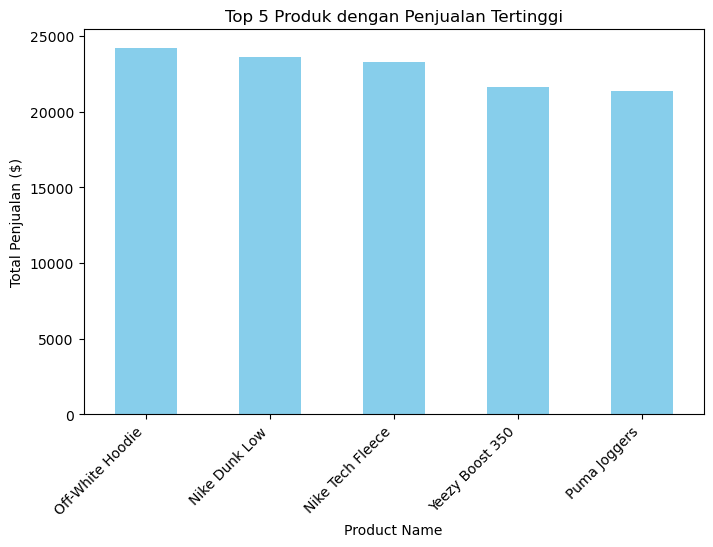

In [20]:
# Hitung total penjualan per produk
top_product = data.groupby('Product Name')['Amount'].sum().sort_values(ascending=False)

# Ambil produk teratas
top_5 = pd.DataFrame({
    "Product Name": [top_product.index[0]],
    "Total Sales": [top_product.iloc[0]]
})

# Tampilkan hasil rapih
print("Produk dengan penjualan tertinggi (Jan - Agustus 2022):")
print(top_5.to_string(index=False))

# Visualisasi 5 besar produk terlaris
top_product.head(5).plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Top 5 Produk dengan Penjualan Tertinggi')
plt.ylabel('Total Penjualan ($)')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretasi:**  
Dari diagram di atas, dapat dilihat lima produk dengan jumlah penjualan terbanyak. Produk dengan penjualan tertinggi adalah Off-White Hoodie, dengan total penjualan mencapai $24.214,81.

### **2. Bagaimana tren penjualan bulanan dari Januari - Agustus 2022?**

/var/folders/6m/jq9rtsnx7m74rk2b3hzjpmd80000gn/T/ipykernel_3744/826152183.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  penjualan_bulanan = data['Amount'].resample('M').sum()


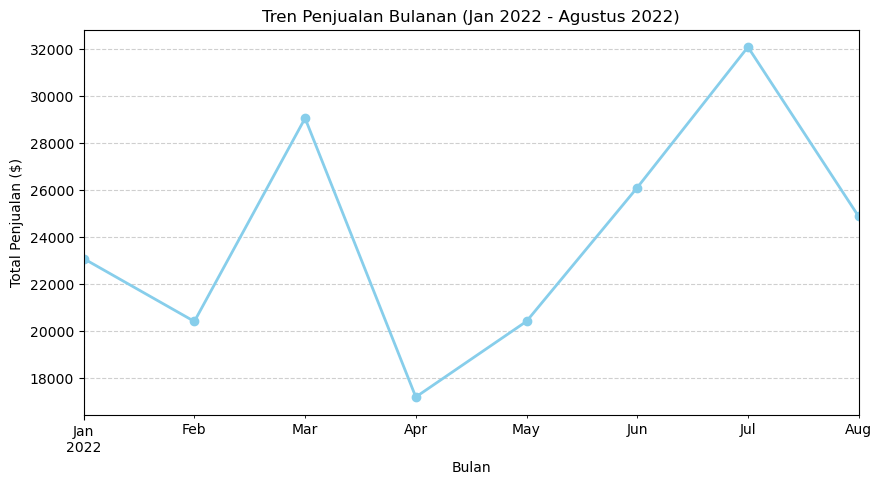

Date
2022-01-31    23067.92
2022-02-28    20393.54
2022-03-31    29043.18
2022-04-30    17176.88
2022-05-31    20397.44
2022-06-30    26089.22
2022-07-31    32073.43
2022-08-31    24861.46
Freq: ME, Name: Amount, dtype: float64


In [21]:
# Hitung total penjualan per bulan
penjualan_bulanan = data['Amount'].resample('M').sum()

# Visualisasi tren bulanan
plt.figure(figsize=(10,5))
penjualan_bulanan.plot(marker='o', linewidth=2, color='skyblue')
plt.title('Tren Penjualan Bulanan (Jan 2022 - Agustus 2022)')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Tampilkan data numeriknya
print(penjualan_bulanan)

**Interpretasi:**   
Penjualan bulan Januari - Agustus 2022 menunjukkan fluktuasi signifikan. Pada bulan Januari - Februari penjualan turun dari $23.067 ke $20.394. Pada bulan Maret penjualan naik tajam ke $29.043, yang kemungkinan disebabkan oleh produk populer, lalu turun drastis di bulan April ke $17.177. Bulan Mei - Juni penjualan mulai naik kembali dari $20.397 ke $26.089, dan mencapai puncak di bulan Juli dengan total penjualan $32.073, dan sedikit turun di Agustus $24.861. Pola ini menunjukkan karakter musiman, dengan Juli sebagai bulan tertinggi.

### **3. Apakah konsumen di negara yang berbeda memiliki preferensi brand yang berbeda?**

**Uji Hipotesis**
1. Rumusan Hipotesis
- H₀: Preferensi brand sama di semua negara (tidak ada perbedaan signifikan).
- H₁: Preferensi brand berbeda antar negara (ada perbedaan signifikan).

2. Tingkat sifnifikansi(alpha): 0.05

3. Jenis uji: Chi-Square Test of Independence

In [22]:
# Membuat tabel kontingensi antara Brand dan Country
contingency = pd.crosstab(data['Brand'], data['Country'])

# Melakukan uji Chi-Square pada tabel kontingensi
chi2, p, dof, expected = chi2_contingency(contingency)

# Menampilkan hasil uji Chi-Square dan p-value
print("Chi-Square:", chi2)
print("P-value:", p)

Chi-Square: 55.83850194183789
P-value: 0.018549242505988352


**Interpretasi:**  
Karena P-value (0,018) < 0,05 maka H₀ ditolak. Dengan tingkat kepercayaan 95% dapat disimpulkan bahwa terdapat perbedaan signifikan dalam preferensi brand antar negara. Hal ini menunjukkan bahwa konsumen di setiap negara memiliki brand favorit yang berbeda, sehingga strategi pemasaran, distribusi, dan kampanye iklan sebaiknya disesuaikan dengan preferensi pasar masing-masing negara untuk meningkatkan penjualan.

### **4. Bagaimana kontribusi tiap kategori terhadap total penjualan Januari–Agustus 2022?**

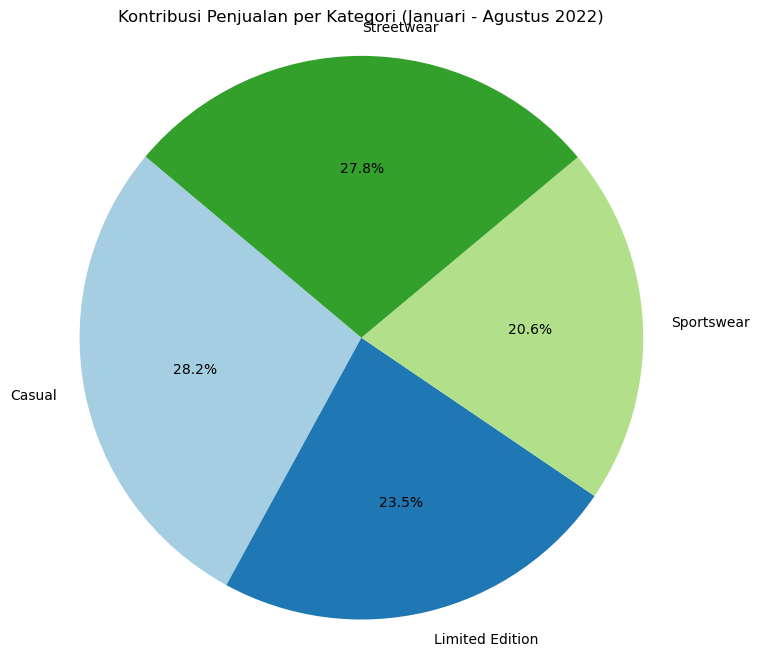

In [23]:
# Hitung total penjualan per kategori
category_sales = data.groupby('Category')['Amount'].sum()

# Buat pie chart
plt.figure(figsize=(8,8))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',  # menampilkan persentase
    startangle=140,
    colors=plt.cm.Paired.colors  # memberi warna berbeda
)
plt.title('Kontribusi Penjualan per Kategori (Januari - Agustus 2022)')
plt.axis('equal')  # supaya pie chart berbentuk lingkaran
plt.show()

**Interpretasi:**  
Berdasarkan diagram di atas, kontribusi penjualan per kategori dari Januari hingga Agustus 2022 menunjukkan bahwa kategori Casual memberikan kontribusi terbesar sebesar 28,2%, diikuti oleh Streetwear sebesar 27,8%, lalu Limited Edition sebesar 23,5%, dan yang terkecil adalah Sportswear sebesar 20,6%. Hal ini mengindikasikan bahwa produk dengan gaya Casual dan Streetwear lebih diminati konsumen dibanding kategori lainnya, sementara Sportswear masih memiliki kontribusi paling rendah terhadap total penjualan. Dengan demikian, perusahaan dapat memprioritaskan strategi pemasaran pada kategori Casual dan Streetwear, namun tetap memperhatikan peluang pengembangan untuk Sportswear dan Limited Edition.

### **5. Strategi apa yang dapat dilakukan untuk meningkatkan penjualan sebesar 10% dalam 6 bulan ke depan?**

In [24]:
# Statistik deskriptif untuk kolom numerik
print("Statistik deskriptif kolom numerik:")
print(data[['Quantity', 'Unit Price', 'Amount']].describe())

# Total penjualan per kategori
category_sales = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("\nTotal penjualan per kategori:")
print(category_sales)

# Rata-rata penjualan per produk
product_sales_avg = data.groupby('Product Name')['Amount'].mean().sort_values(ascending=False)
print("\nRata-rata penjualan per produk (Top 5):")
print(product_sales_avg.head())

# Rata-rata jumlah unit per produk
product_quantity_avg = data.groupby('Product Name')['Quantity'].mean().sort_values(ascending=False)
print("\nRata-rata jumlah unit per produk (Top 5):")
print(product_quantity_avg.head())

# Persentase kontribusi tiap kategori terhadap total penjualan
category_percent = (category_sales / category_sales.sum() * 100).round(2)
print("\nPersentase kontribusi tiap kategori (%):")
print(category_percent)

Statistik deskriptif kolom numerik:
         Quantity  Unit Price       Amount
count  353.000000  353.000000   353.000000
mean     3.107649  174.607054   547.034193
std      1.408083   71.625710   343.084461
min      1.000000   50.100000    50.100000
25%      2.000000  113.750000   268.780000
50%      3.000000  175.510000   494.400000
75%      4.000000  235.500000   783.930000
max      5.000000  299.730000  1496.500000

Total penjualan per kategori:
Category
Casual             54378.62
Streetwear         53725.12
Limited Edition    45297.50
Sportswear         39701.83
Name: Amount, dtype: float64

Rata-rata penjualan per produk (Top 5):
Product Name
Nike Dunk Low        716.193636
Jordan 1 High        639.214242
Nike Tech Fleece     567.002927
Adidas Ultraboost    542.849286
Puma Joggers         520.537073
Name: Amount, dtype: float64

Rata-rata jumlah unit per produk (Top 5):
Product Name
Jordan 1 High                 3.424242
Nike Tech Fleece              3.414634
Nike Dunk Low      

**Interpretasi:**  
Berdasarkan data penjualan Januari - Agustus 2022, strategi untuk meningkatkan penjualan sebesar 10% dalam 6 bulan ke depan dapat dilakukan dengan beberapa langkah. Pertama, fokus pada kategori utama yaitu Casual dan Streetwear, karena kedua kategori ini menyumbang lebih dari setengah total penjualan, pastikan stok produk populer selalu tersedia dan buat promosi khusus atau bundling untuk mendorong pembelian lebih banyak. Kedua, optimalkan produk best seller seperti Nike Dunk Low, Jordan 1 High, dan Nike Tech Fleece dengan strategi upselling dan cross-selling untuk meningkatkan jumlah unit terjual. Ketiga, dorong kategori dengan kontribusi lebih rendah, yaitu Limited Edition dan Sportswear, melalui diskon, paket bundling, atau penawaran eksklusif agar kontribusinya meningkat. Keempat, evaluasi harga produk agar tetap kompetitif sambil memberikan margin yang baik, dan manfaatkan diskon terbatas atau promo waktu tertentu untuk mendorong pembelian cepat. Terakhir, jalankan kampanye pemasaran digital yang terarah, seperti iklan media sosial dan email marketing, menargetkan pelanggan yang sebelumnya membeli produk populer.

## **v. Pengambilan Kesimpulan**

Off-White Hoodie dan kategori Casual serta Streetwear menjadi motor penjualan utama di bulan Januari - Agustus 2022, sementara tren bulanan menunjukkan fluktuasi signifikan dengan puncak di bulan Juli. Preferensi brand berbeda antar negara, sehingga strategi pemasaran dan distribusi sebaiknya disesuaikan dengan karakteristik pasar masing-masing. Untuk meningkatkan penjualan 10% dalam 6 bulan ke depan, perusahaan sebaiknya fokus pada produk dan kategori populer, optimalkan kategori dengan penjualan rendah melalui promosi dan bundling, serta jalankan kampanye digital yang terarah. Strategi ini akan membantu memaksimalkan penjualan sekaligus memanfaatkan peluang pasar secara lebih efektif.